In [1]:
import pandas as pd
import numpy as np
import os
from glob import glob

In [2]:
data_dir = "/Users/potato/Downloads/amr3_p45"
outdir = '/Users/potato/Downloads/nrel_result_test'



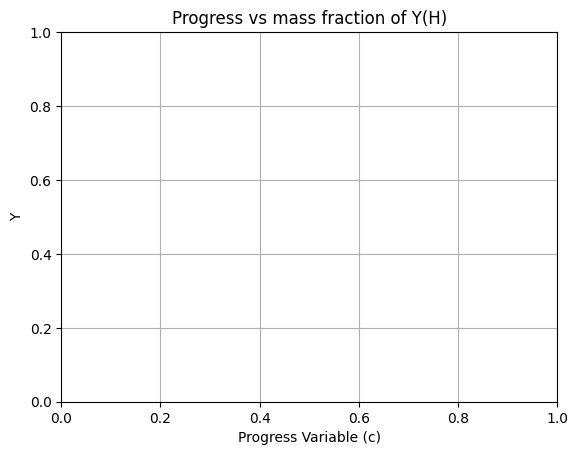

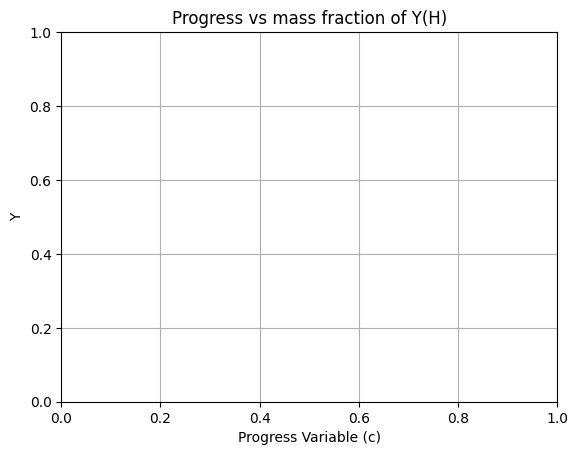

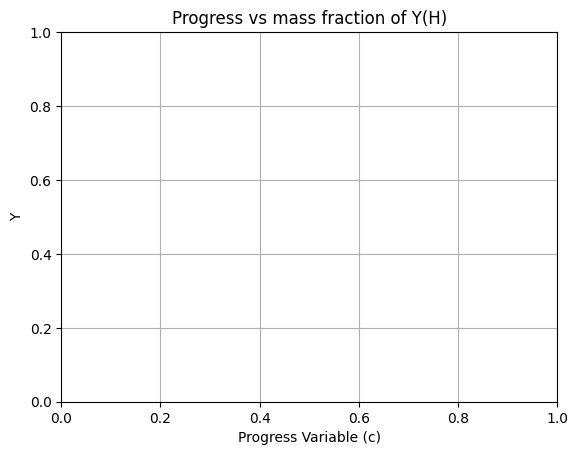

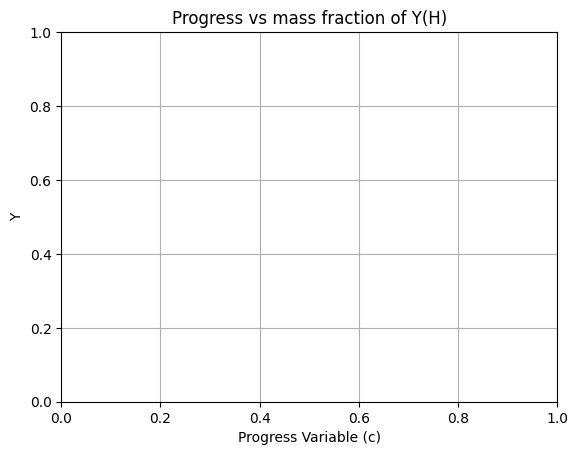

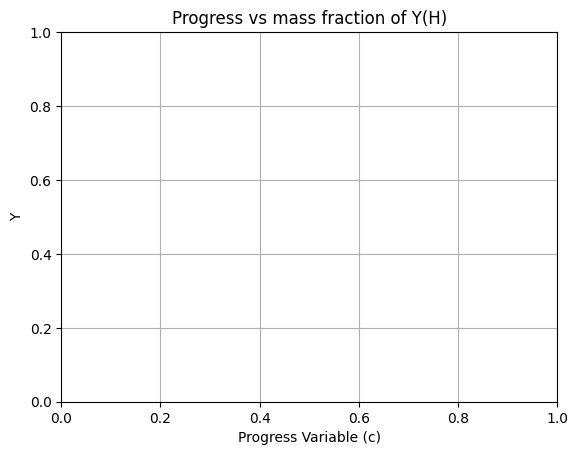

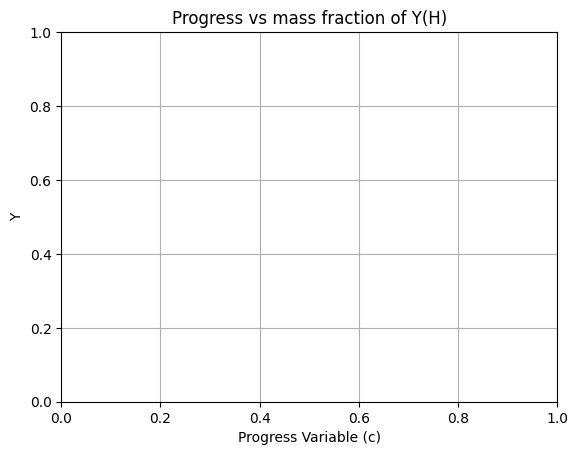

IndexError: index 9 is out of bounds for axis 0 with size 9

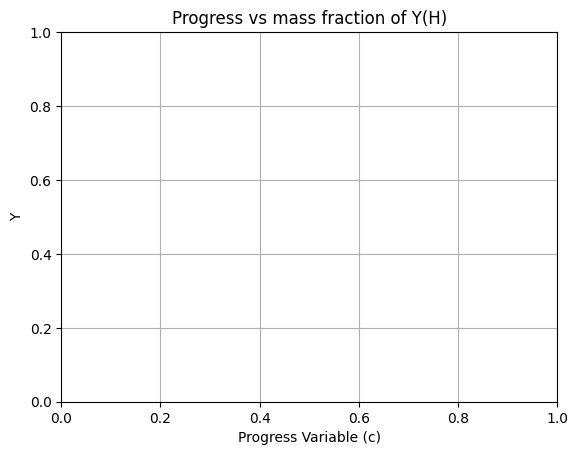

In [60]:

csv_files = [f for f in os.listdir(data_dir) if f.endswith(".csv")]
csv_files = sorted(csv_files)
df = pd.read_csv(data_dir+'/'+csv_files[0])
spec_list = df.columns[3:]
num_file = len(csv_files)
temp_list = []
y_h2_ub = 0.013040
c= [] # progress variable
time_list = []
y_all = np.zeros((9,num_file))

for i in range(len(csv_files)):
    
    df = pd.read_csv(data_dir+'/'+csv_files[i])
    df_n = df[df['Temp_K']>310]
    time_list.append( df_n['time_s'].iloc[0])
    temp_list.append(df_n.iloc[:,2].mean())
    temp_c = 1- y_h2_ub/np.array(df_n['Y(H2)'])
    for j in range(3,12):
        #print(f'species: {df_n.columns[j]}')
        plt.title(f'Progress vs mass fraction of {spec_list[j]}')
        plt.xlabel('Progress Variable (c)')
        plt.ylabel('Y')
        plt.grid()
        plt.savefig(f'{outdir}/{spec_list[j]}.png',dpi=300,bbox_inches="tight")
        plt.show()


    break
c = [ 1- i/y_h2_ub for i in y_all[1]]    

    

In [34]:
c = [ 1- i/y_h2_ub for i in y_all[1]] 
c

[0.9293846557909428,
 0.9196911578844357,
 0.9145070958001382,
 0.9164255769381467,
 0.9268898161741145,
 0.9052646896009965,
 0.8877240824969446,
 0.9089237442425993,
 0.9065598179415097,
 0.9090072421230089,
 0.9128447002559384,
 0.919441265456499,
 0.8965692087431195,
 0.890368338761101,
 0.9054302367368028,
 0.8992560525041228,
 0.8798123067799225,
 0.900285367039408,
 0.8978911922123443,
 0.9087764766294633,
 0.9159281809379366,
 0.9165950820541451,
 0.9282582360978551,
 0.9056911022185138,
 0.9112276969187741]

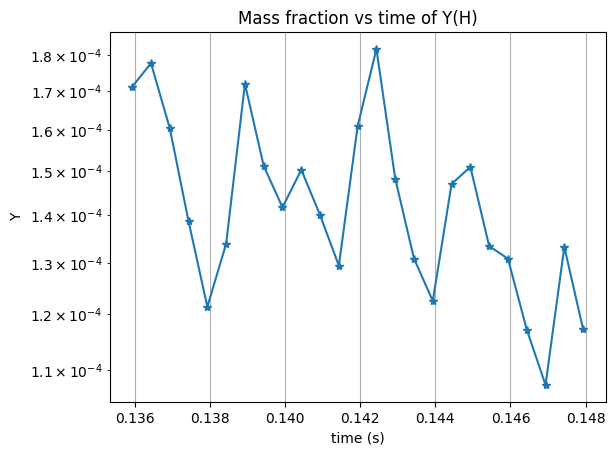

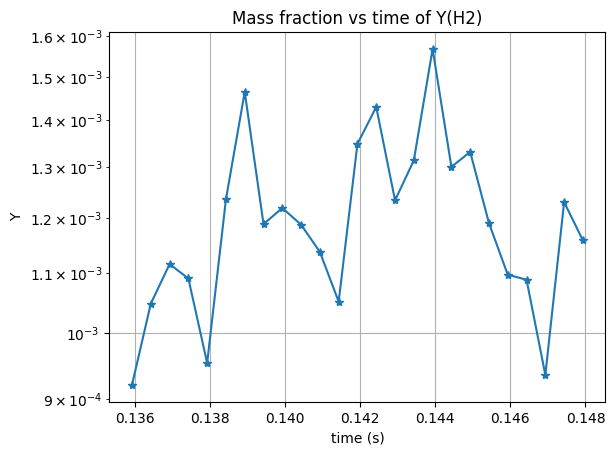

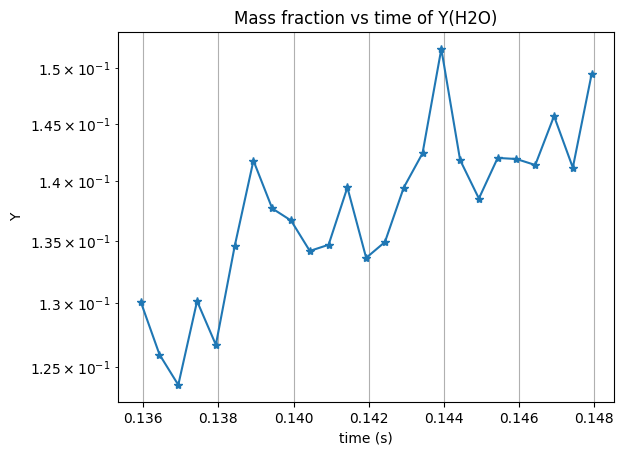

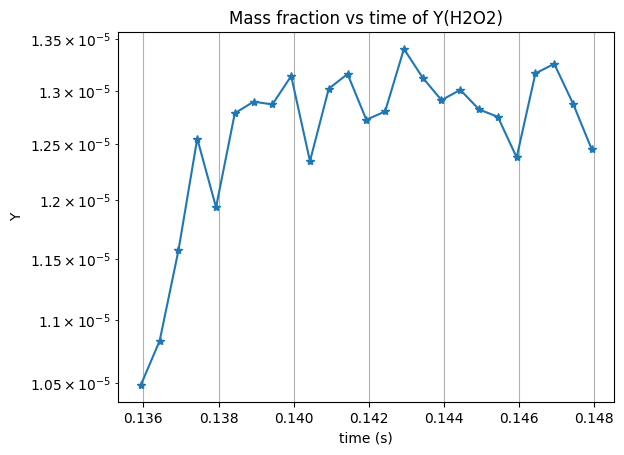

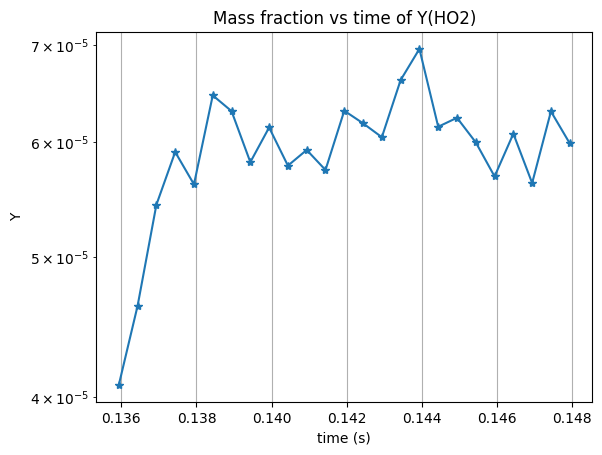

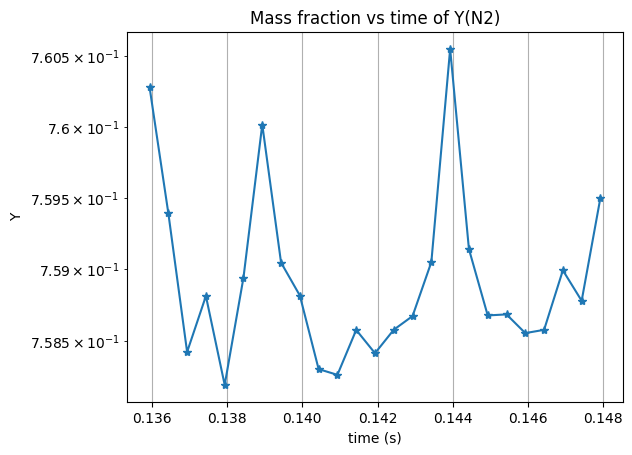

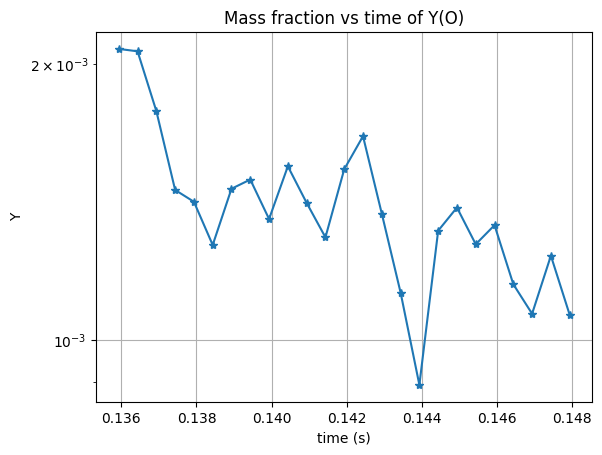

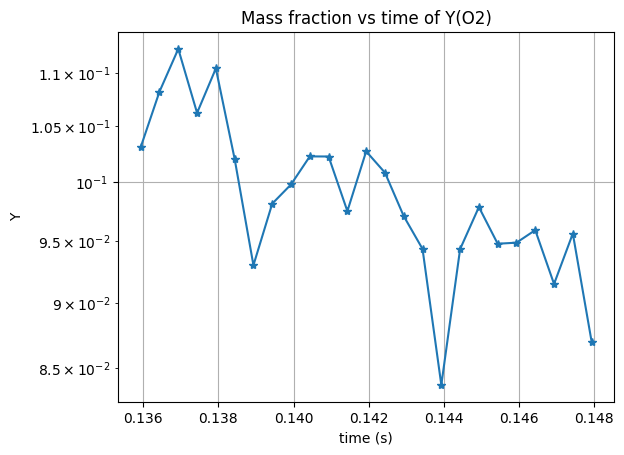

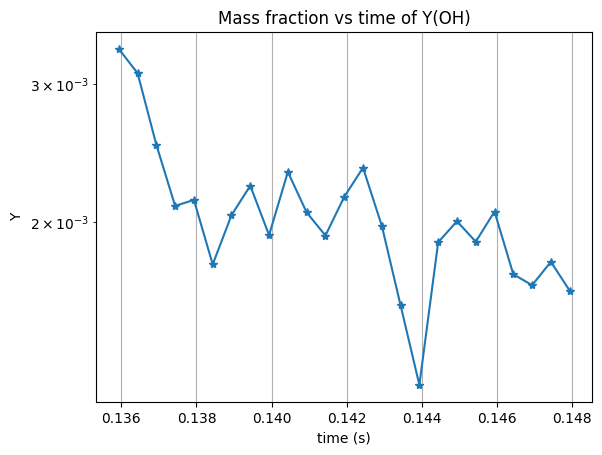

In [45]:
import matplotlib.pyplot as plt
for i in range(0,9):
    plt.semilogy(time_list,y_all[i],'-*',label=spec_list[i])
    plt.title(f'Mass fraction vs time of {spec_list[i]}')
    plt.xlabel('time (s)')
    plt.ylabel('Y')
    plt.grid()
    plt.savefig(f'{outdir}/{spec_list[i]}.png',dpi=300,bbox_inches="tight")
    plt.show()



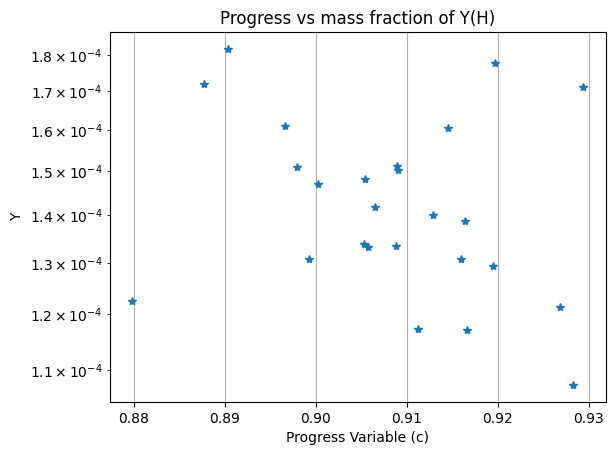

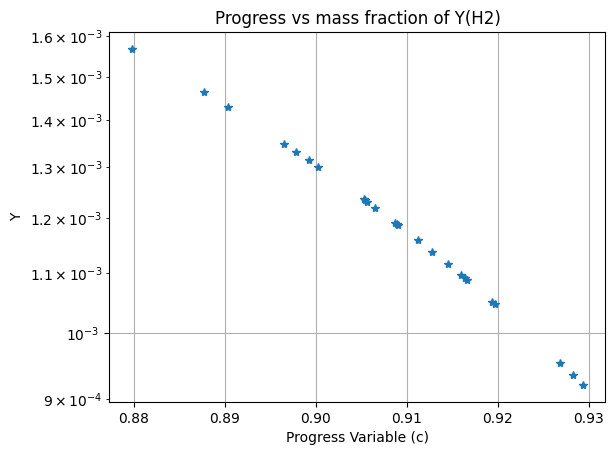

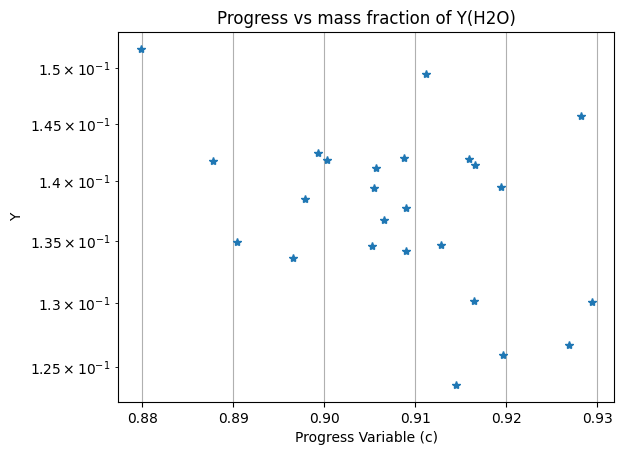

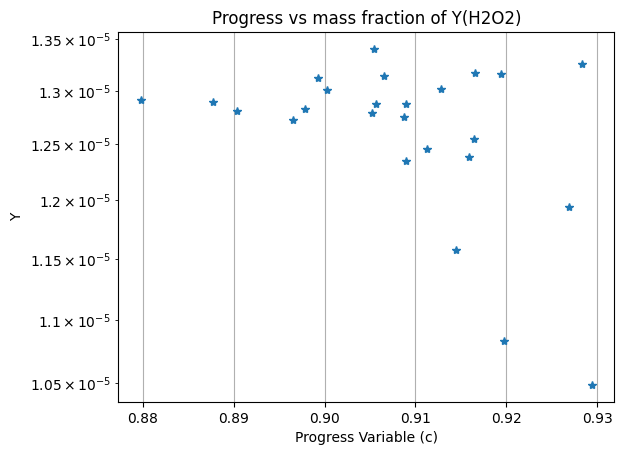

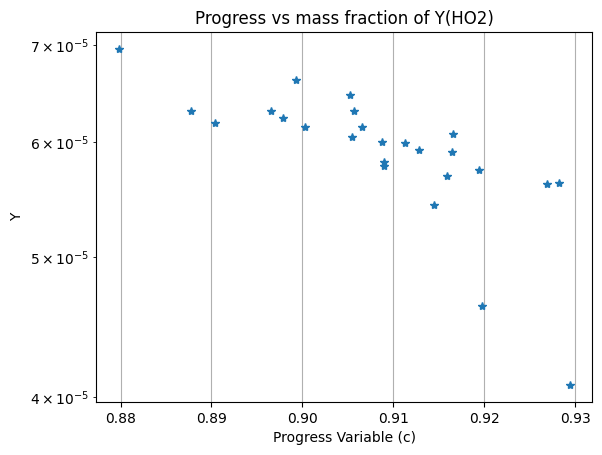

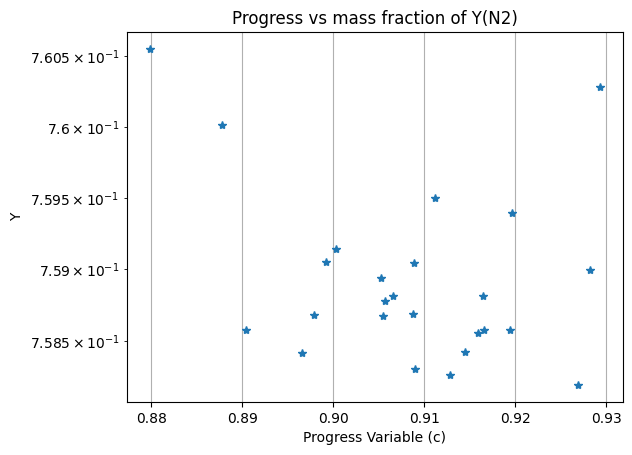

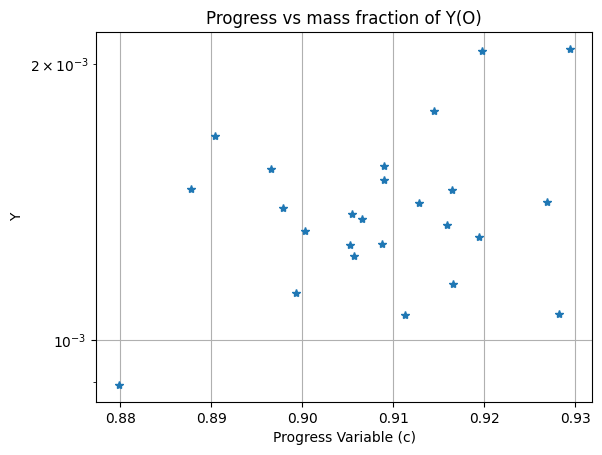

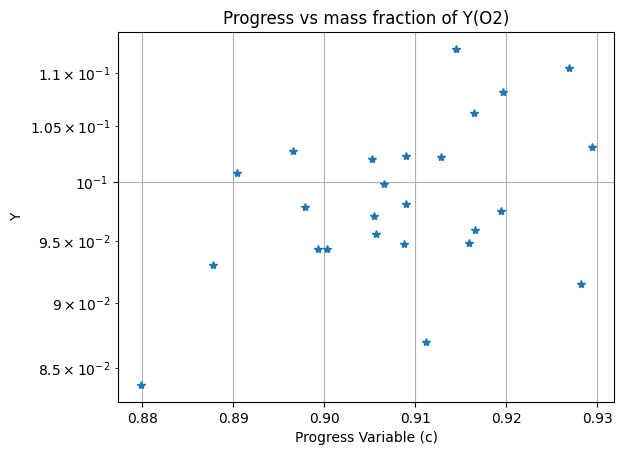

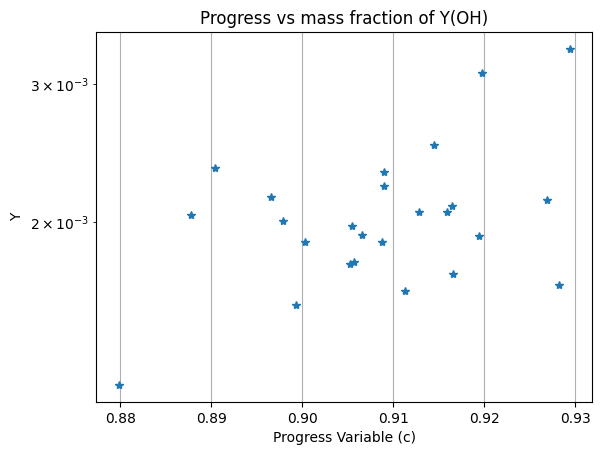

IndexError: index 9 is out of bounds for axis 0 with size 9

In [46]:
import matplotlib.pyplot as plt
for i in range(0,10):
    plt.semilogy(c,y_all[i],'*',label=spec_list[i])
    plt.title(f'Progress vs mass fraction of {spec_list[i]}')
    plt.xlabel('Progress Variable (c)')
    plt.ylabel('Y')
    plt.grid()
    plt.savefig(f'{outdir}/{spec_list[i]}.png',dpi=300,bbox_inches="tight")
    plt.show()


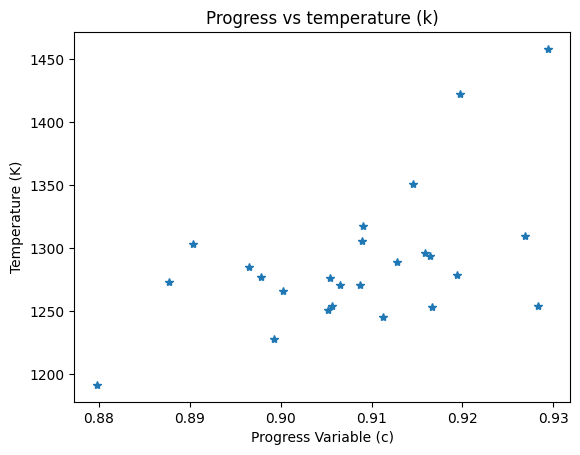

In [48]:
plt.plot(c,temp_list,'*')
plt.title(f'Progress vs temperature (k)')
plt.xlabel('Progress Variable (c)')
plt.ylabel('Temperature (K)')
plt.savefig(f'{outdir}/Progress_vs_temperature (k).png')

In [101]:
d1 = '/Users/potato/Downloads/plt44000_p45_test1.csv'
d1z = '/Users/potato/Downloads/plt44000_p45_withZ.csv'
d_ext =  "/Users/potato/Downloads/full_profile_before_extinction (1).csv" 
d3 = "/Users/potato/Documents/exp_result_analysis/premixed_flame_profile_240pts.csv"
df1 = pd.read_csv(d1)
df_ext = pd.read_csv(d_ext)
df_ff = pd.read_csv(d3)
df = pd.read_csv(d1z)

In [107]:
temp_c = 1- np.array(df['Y(H2)'])/y_h2_ub
c_ext = [1- i/y_h2_ub for i in df_ext['Y(H2)'] ]
c_ff = [1- j/y_h2_ub for j in df_ff['Y(H2)']]
spec_list = df.columns
df_ext.columns
df_ff.columns
df.columns

Index(['Unnamed: 0', 'time_s', 'Temp_K', 'z_m', 'Y(H)', 'Y(H2)', 'Y(H2O)',
       'Y(H2O2)', 'Y(HO2)', 'Y(N2)', 'Y(O)', 'Y(O2)', 'Y(OH)'],
      dtype='object')

Y(H)


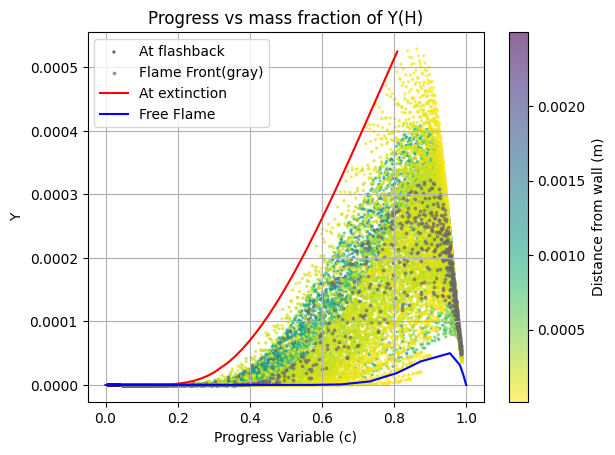

Y(H2)


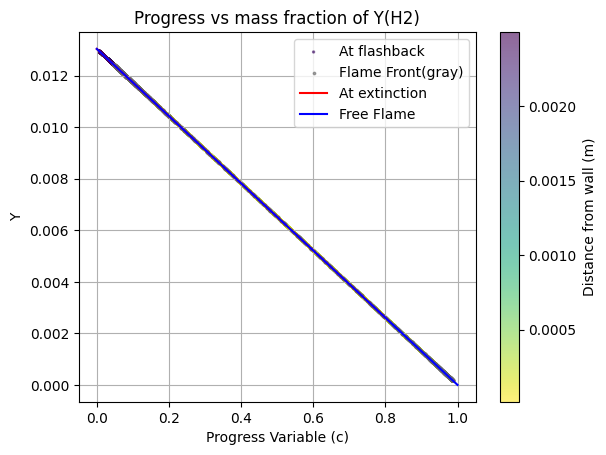

Y(H2O)


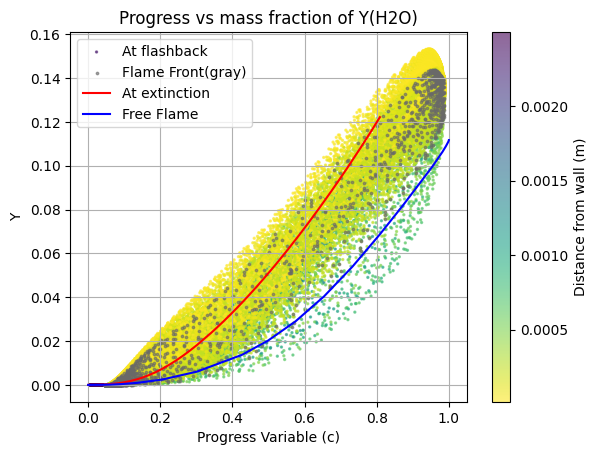

Y(H2O2)


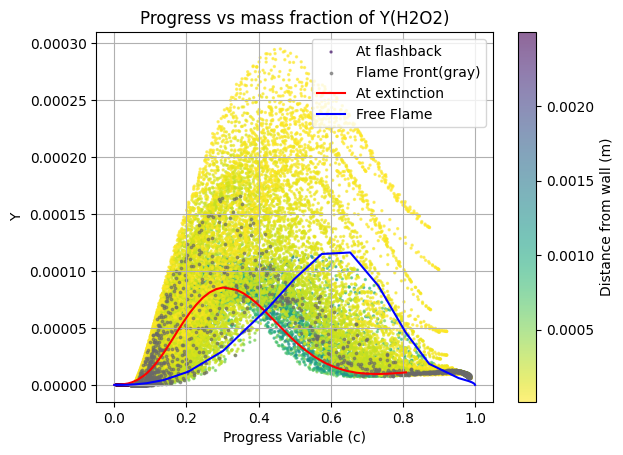

Y(HO2)


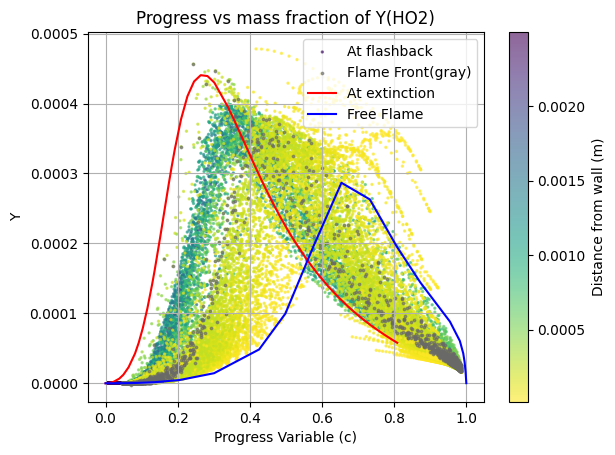

Y(N2)


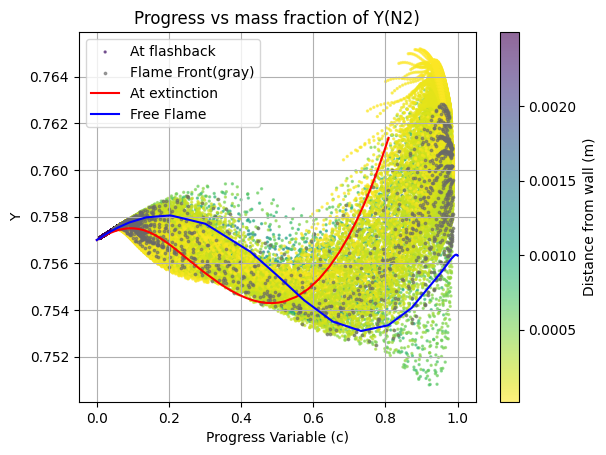

Y(O)


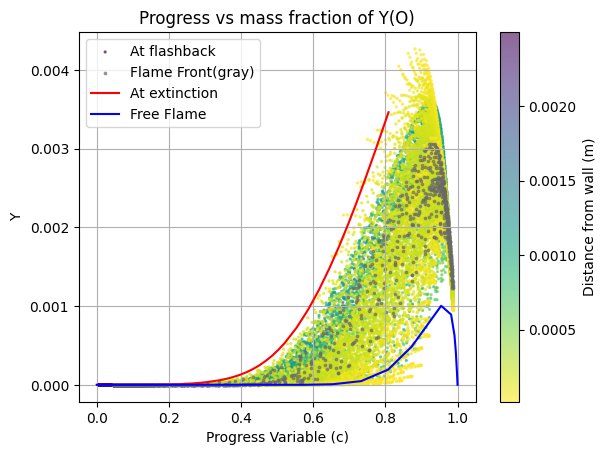

Y(O2)


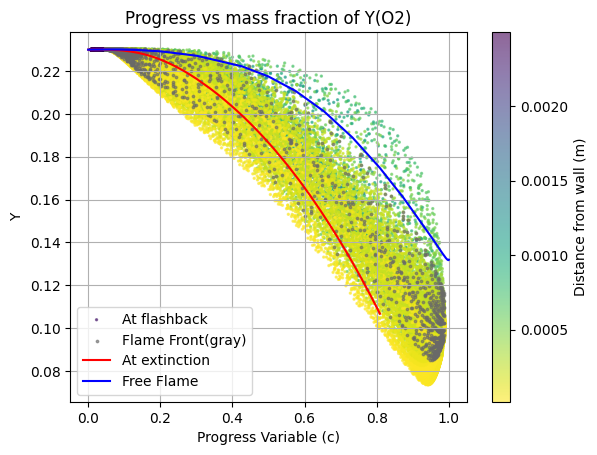

Y(OH)


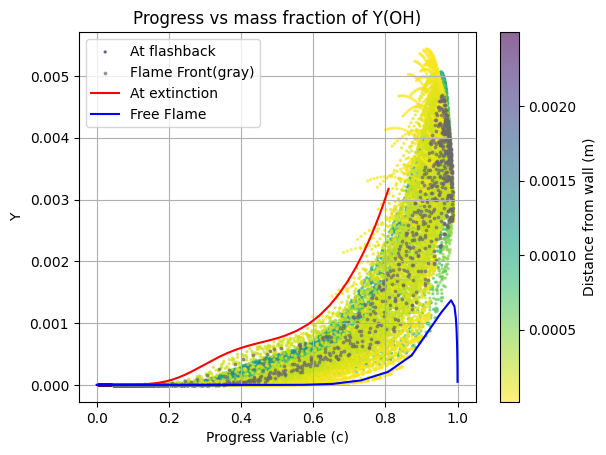

In [167]:

z_m = df["z_m"]
z_close_range = 3.0762e-4
thickness = 0.2e-4
z_low = z_close_range - thickness
z_hgh = z_close_range + thickness
filter1 = (z_m <= z_hgh) & (z_m>= z_low)
for j in range(4,13):
    #print(f'species: {df_n.columns[j]}')
    select_col = df.columns[j]
    print(select_col)
    
    plt.scatter(temp_c,df.iloc[:,j],s=2,c=z_m,cmap="viridis_r",alpha=0.6,label ="At flashback")
    cbar=plt.colorbar()
    cbar.set_label('Distance from wall (m)')
    #plt.scatter(temp_c,df.iloc[:,j],s=2,label ="At flashback")
    plt.scatter(temp_c[filter1],df.iloc[:,j][filter1],s=3, color = 'dimgrey',label ='Flame Front(gray)',alpha=0.6 )
    plt.plot(c_ext,df_ext[select_col],'red',label='At extinction')
    plt.plot(c_ff,df_ff[select_col],'blue',label='Free Flame')
    plt.title(f'Progress vs mass fraction of {spec_list[j]}')
    plt.xlabel('Progress Variable (c)')
    plt.ylabel('Y')
    plt.legend()
    plt.grid()
    #plt.savefig(f'{outdir}/plt44000_n_Ext_n_FreeFlame_{spec_list[j]}.png',dpi=300,bbox_inches="tight")
    plt.savefig(f'{outdir}/plt44000_n_Ext_n_FreeFlame_n_wallDst_FlameFront_{spec_list[j]}.png',dpi=300,bbox_inches="tight")
    plt.show()


    """
    """

In [127]:
df.columns

Index(['Unnamed: 0', 'time_s', 'Temp_K', 'z_m', 'Y(H)', 'Y(H2)', 'Y(H2O)',
       'Y(H2O2)', 'Y(HO2)', 'Y(N2)', 'Y(O)', 'Y(O2)', 'Y(OH)'],
      dtype='object')

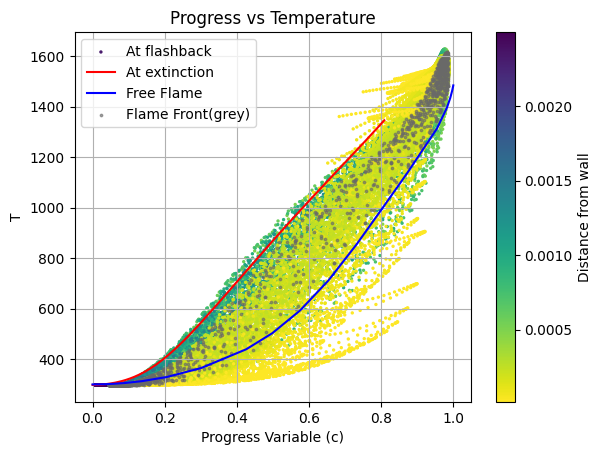

In [168]:

#plt.scatter(temp_c,df['Temp_K'],s=2,label ="At flashback")

plt.scatter(temp_c,df['Temp_K'],s=2,c=z_m,cmap="viridis_r",label ="At flashback")
cbar=plt.colorbar()
cbar.set_label('Distance from wall')
plt.plot(c_ext,df_ext['T'],'red',label='At extinction')
plt.plot(c_ff,df_ff['T'],'blue',label='Free Flame')
plt.scatter(temp_c[filter1],df['Temp_K'][filter1],s=3, color = 'dimgrey',label ='Flame Front(grey)',alpha=0.6 )
plt.title(f'Progress vs Temperature')
plt.xlabel('Progress Variable (c)')
plt.ylabel('T')
plt.grid()
plt.legend()
#plt.savefig(f'{outdir}/plt44000_n_Ext_n_FreeFlame_temp.png',dpi=300,bbox_inches="tight")
plt.savefig(f'{outdir}/plt44000_n_Ext_n_FreeFlame_n_WallDst_FlameFront_temp.png',dpi=300,bbox_inches="tight")
plt.show()

In [150]:
z_close_range = 3.0762e-4
thickness = 0.5e-4
z_low = z_close_range - thickness
z_hgh = z_close_range + thickness
filter1 = (z_m <= z_hgh) & (z_m>= z_low)
df.iloc[:,j][filter1]

1098     2.418805e-03
1126     1.846588e-03
1154     1.398892e-03
1182     1.099389e-03
1210     9.262982e-04
             ...     
53538    1.193437e-17
53558    2.484119e-17
53578    4.673944e-17
53598    7.305829e-17
53618    8.078774e-17
Name: Y(OH), Length: 2035, dtype: float64